In [64]:
import os

mylist = os.listdir('./images/')
print(mylist)
print(len(mylist))




['000000017207.jpg', '000000002261.jpg', '000000016451.jpg', '000000002473.jpg', '000000022371.jpg', '000000017905.jpg', '000000001296.jpg', '000000001268.jpg', '000000002153.jpg', '000000001000.jpg', '000000002006.jpg', '000000024144.jpg']
12


In [65]:
import time

import numpy as np
import cv2
ti=[]

for q in range(len(mylist)):
    st=mylist[q]
    # read input image
    
    image = cv2.imread(r"./images/"+st)
    Width = image.shape[1]
    Height = image.shape[0]
    scale = 0.00392
    # read class names from text file
    classes = None
    with open("./coco.names", 'r') as f:
       classes = [line.strip() for line in f.readlines()]
    # generate different colors for different classesabs
    COLORS = np.random.uniform(0, 255, size=(len(classes), 3))
    # read pre-trained model and config file
    net = cv2.dnn.readNet("yolov3.weights", "./yolov3.cfg")
    start = time.time()
    # create input blob
    blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)
    # set input blob for the network
    net.setInput(blob)
    # function to get the output layer names
    # in the architecture
    def get_output_layers(net):
       layer_names = net.getLayerNames()
       output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
       return output_layers
    # function to draw bounding box on the detected object with class name
    def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):
       label = str(classes[class_id])
       color = COLORS[class_id]
       cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
       cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    # run inference through the network
    # and gather predictions from output layers
    outs = net.forward(get_output_layers(net))
    # initialization
    class_ids = []
    confidences = []
    boxes = []
    conf_threshold = 0.5
    nms_threshold = 0.4
    # for each detetion from each output layer
    # get the confidence, class id, bounding box params
    # and ignore weak detections (confidence < 0.5)
    for out in outs:
       for detection in out:
           scores = detection[5:]
           class_id = np.argmax(scores)
           confidence = scores[class_id]
           if confidence > 0.5:
               center_x = int(detection[0] * Width)
               center_y = int(detection[1] * Height)
               w = int(detection[2] * Width)
               h = int(detection[3] * Height)
               x = center_x - w / 2
               y = center_y - h / 2
               class_ids.append(class_id)
               confidences.append(float(confidence))
               boxes.append([x, y, w, h])
    # apply non-max suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    # go through the detections remaining
    # after nms and draw bounding box
    for i in indices:
       i = i[0]
       box = boxes[i]
       x = box[0]
       y = box[1]
       w = box[2]
       h = box[3]
       draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
    # display output image
    cv2.imshow("object detection", image)
    end = time.time()
    
    ti.append(end - start)
    print(end - start,"seconds")
    
    # wait until any key is pressed
    print(class_ids)
    for i in class_ids:
        print(classes[i])
    cv2.waitKey()
    # save output image to disk
    #cv2.imwrite("object-detection.jpg", image)
    # release resources
    cv2.destroyAllWindows()

print(ti)



1.40059232711792 seconds
[5, 7, 0, 3, 2]
bus
truck
person
motorbike
car
1.3474297523498535 seconds
[0, 0, 37]
person
person
surfboard
1.343778371810913 seconds
[37, 56, 56, 37, 37, 26, 26, 0]
surfboard
chair
chair
surfboard
surfboard
handbag
handbag
person
1.368520975112915 seconds
[0, 0, 30, 0, 0, 0, 0]
person
person
skis
person
person
person
person
1.3437554836273193 seconds
[0, 63, 27]
person
laptop
tie
1.3226268291473389 seconds
[9, 0, 9]
traffic light
person
traffic light
1.3674461841583252 seconds
[0, 67, 0, 67]
person
cell phone
person
cell phone
1.3663012981414795 seconds
[0, 26, 0, 0, 0, 26]
person
handbag
person
person
person
handbag
1.3294832706451416 seconds
[0, 0, 34, 0, 0, 0]
person
person
baseball bat
person
person
person
1.3558287620544434 seconds
[0, 0, 0, 0, 0, 0, 0, 0, 38, 0, 0, 0, 0, 0, 38, 0]
person
person
person
person
person
person
person
person
tennis racket
person
person
person
person
person
tennis racket
person
1.3568322658538818 seconds
[5, 0, 0, 9]
bus
perso

<function matplotlib.pyplot.show(*args, **kw)>

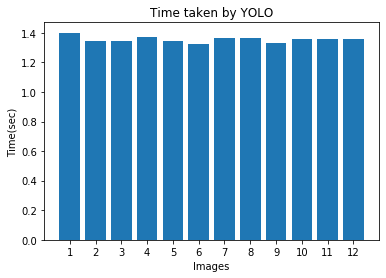

In [79]:
import matplotlib.pyplot as plt
 
images=[1,2,3,4,5,6,7,8,9,10,11,12]

# Plot the bar graph
plot = plt.bar(images,ti)

 
# Add labels and title
plt.title("Time taken by YOLO")
plt.xlabel("Images")
plt.ylabel("Time(sec)")
plt.xticks(images)
 
# Display the graph on the screen
plt.show

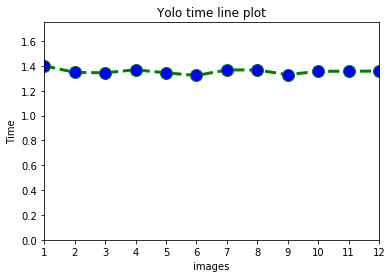

In [67]:

import matplotlib.pyplot as plt 

# plotting the points  
plt.plot(images, ti, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0,1.75) 
plt.xlim(1,12) 

  
# naming the x axis 
plt.xlabel('images') 
# naming the y axis 
plt.ylabel('Time(sec)') 
plt.xticks(images)

# giving a title to my graph 
plt.title('Yolo time line plot') 
  
# function to show the plot 
plt.show() 


### List of times for the RCNN model
#### taken from notebook in drive


In [68]:
time=[9.52395872149658, 10.456350672159658, 11.456350672159658, 9.856350672159659, 8.96350892159123, 9.36350672159658, 8.99638065615965, 10.8350672159658, 9.36350672564658, 9.6350672158958, 11.194804668426514, 12.010172128677368]

<function matplotlib.pyplot.show(*args, **kw)>

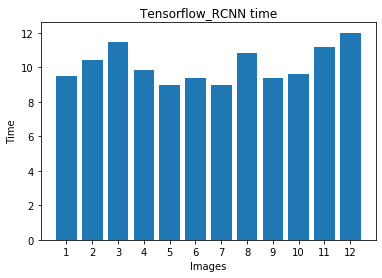

In [73]:
import matplotlib.pyplot as plt
 
images=[1,2,3,4,5,6,7,8,9,10,11,12]

# Plot the bar graph
plot = plt.bar(images,time)

 
# Add labels and title
plt.title("Tensorflow_RCNN time")
plt.xlabel("Images")
plt.ylabel("Time(sec)")
plt.xticks(images)
 
# Display the graph on the screen
plt.show

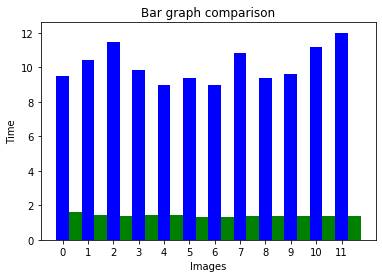

In [75]:
import numpy as np
import matplotlib.pyplot as plt

data = [[9.52395872149658, 10.456350672159658, 11.456350672159658, 9.856350672159659, 8.96350892159123, 9.36350672159658, 8.99638065615965, 10.8350672159658, 9.36350672564658, 9.6350672158958, 11.194804668426514, 12.010172128677368],
  [1.626952886581421, 1.441927194595337, 1.3616983890533447, 1.4592626094818115, 1.448399543762207, 1.3365764617919922, 1.3466055393218994, 1.3622472286224365, 1.3761065006256104, 1.3657498359680176, 1.359654426574707, 1.3619511127471924]]
X = np.arange(12)
plt.bar(X + 0.0, data[0], color = 'b', width = 0.5)
plt.bar(X + 0.5, data[1], color = 'g', width = 0.5)

plt.xlabel("Images")
plt.ylabel("Time(sec)")
plt.title("Bar graph comparison")

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11])



plt.show()

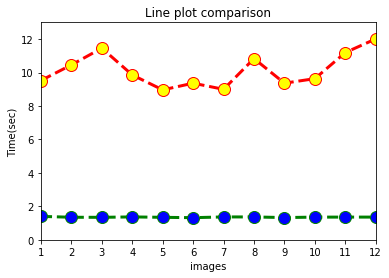

In [78]:

import matplotlib.pyplot as plt 

# plotting the points  
plt.plot(images, ti, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.plot(images, time, color='red', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='yellow', markersize=12) 
  
# setting x and y axis range 
plt.ylim(0,13) 
plt.xlim(1,12) 

  
# naming the x axis 
plt.xlabel('images') 
# naming the y axis 
plt.ylabel('Time(sec)') 
plt.xticks(images)

# giving a title to my graph 
plt.title('Line plot comparison') 
  
# function to show the plot 
plt.show() 